# Классификация треков для стримингового сервиса "МиФаСоль".

## Описание проекта:

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. 

## Цель проекта:

В течении 2х недель разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

## Исходные данные:

train.csv - информация (~20000) музыкальных треках, которые будут использоваться в качестве обучающих данных.

test.csv - информация (~5000) музыкальных треках, которые будут использоваться в качестве тестовых данных. 

### Ваша задача - предсказать значение 'music_genre' для каждого трека из этого датасета.

**instance_id** -Уникальный идентификатор трека

**track_name** - Название трека

**acousticness** - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.

**danceability** - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.

**duration_ms** - Продолжительность трека в миллисекундах.

**energy** - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра

**instrumentalness** - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала

**key** - базовый ключ (нота) произведения

**liveness** - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую

**loudness** - Общая громкость трека в децибелах (дБ)

**mode** - Указывает на модальность (мажорную или минорную) трека

**speechiness** - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.

**tempo** - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов

**obtained_date** - дата загрузки в сервис

**valence** - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)

**music_genre** - Музыкальный жанр трека


### Шаг 1. Откроем и посмотрим данные:

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import set_config
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

Откроем данные

In [2]:
df_train = pd.read_csv('kaggle_music_genre_train.csv')

df_test = pd.read_csv('kaggle_music_genre_test.csv')

display(df_train.head())

display(df_test.head())

df_train.info()

df_test.info()

display(df_train.describe())

display(df_test.describe())


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,20394.000000,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,55973.846916,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.942522,0.464588
std,20695.792545,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.427590,0.243387
min,20011.000000,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,38157.250000,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,95.921750,0.272000
50%,56030.000000,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.012500,0.457000
75%,73912.750000,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,141.966250,0.653000
max,91758.000000,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,5099.000000,5099.000000,5099.000000,5.099000e+03,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,4978.000000,5099.000000
mean,55643.871347,0.276324,0.561888,2.173974e+05,0.622030,0.165198,0.197924,-8.630186,0.092718,121.246463,0.465593
std,20762.384803,0.322657,0.170502,1.156374e+05,0.251829,0.311940,0.166241,5.619766,0.100130,29.875950,0.244217
min,20012.000000,0.000002,0.059600,-1.000000e+00,0.001540,0.000000,0.020400,-46.122000,0.022600,37.114000,0.020500
25%,37571.000000,0.016600,0.451000,1.737335e+05,0.465000,0.000000,0.096950,-10.231000,0.035700,96.070250,0.272000
50%,55246.000000,0.120000,0.568000,2.175000e+05,0.660000,0.000157,0.129000,-7.135000,0.048700,120.053500,0.458000
75%,73702.000000,0.460000,0.681000,2.642470e+05,0.826000,0.092750,0.248000,-5.127000,0.096550,141.934250,0.650000
max,91709.000000,0.996000,0.977000,1.360027e+06,0.999000,0.994000,0.990000,1.949000,0.918000,216.029000,0.982000


Как можно заметить данные из столбцов track_name, key, mode, obtained_date и music_genre содержат дискретные величины. Эти столбцы, кроме track_name, можно проверить методом unique (track_name будет логичнее проверить на дубликаты, т.к. названия треков скорее всего разные и их очень много). 

Также видны пропуски в столбцах key, mode, tempo. Они составляют малый процент от данных, можно их отбросить.

### Шаг 2. Предобработка и исследовательский анализ данных

In [3]:
print(df_train['key'].unique())

print(df_train['mode'].unique())

print(df_train['obtained_date'].unique())

print(df_train['music_genre'].unique())

print()

print(df_test['key'].unique())

print(df_test['mode'].unique())

print(df_test['obtained_date'].unique())


['D' 'A' 'E' 'G#' 'C' 'D#' 'A#' 'F' 'F#' nan 'G' 'C#' 'B']
['Major' 'Minor' nan]
['4-Apr' '3-Apr' '5-Apr' '1-Apr']
['Country' 'Rock' 'Alternative' 'Hip-Hop' 'Blues' 'Jazz' 'Electronic'
 'Anime' 'Rap' 'Classical']

['A#' 'G#' 'A' 'B' 'D' 'F#' 'F' 'G' 'C' nan 'D#' 'C#' 'E']
['Minor' 'Major' nan]
['4-Apr' '3-Apr' '5-Apr' '1-Apr']


In [4]:
print(df_train.duplicated().value_counts())
print(df_test.duplicated().value_counts())

False    20394
Name: count, dtype: int64
False    5099
Name: count, dtype: int64


Ничего необычного кроме пропусков я не заметил. В целом дату можно преобразовать в числовое значение, т.к. месяц одинаковый. Числовые значения судя по показаниям метода describe в норме. Предлагаю подтвердить это при помощи графиков.

Дату преобразуем при помощи функции:

In [5]:
def date_changer(row):
    return int(row.split('-')[0])

df_train['obtained_date'] = df_train['obtained_date'].apply(date_changer)
df_test['obtained_date'] = df_test['obtained_date'].apply(date_changer)

Предлагаю удалить пропуски, т.к. они составляют незначительную часть данных.

In [6]:
df_train = df_train.dropna(subset=['key', 'mode', 'tempo'])
df_test = df_test.dropna(subset=['key', 'mode', 'tempo'])

In [7]:
print(df_train['key'].unique())

print(df_train['mode'].unique())

print(df_train['obtained_date'].unique())

print(df_train['music_genre'].unique())

print()

print(df_test['key'].unique())

print(df_test['mode'].unique())

print(df_test['obtained_date'].unique())

['D' 'A' 'E' 'G#' 'C' 'D#' 'A#' 'F' 'F#' 'G' 'C#' 'B']
['Major' 'Minor']
[4 3 5 1]
['Country' 'Rock' 'Alternative' 'Hip-Hop' 'Blues' 'Jazz' 'Electronic'
 'Anime' 'Rap' 'Classical']

['A#' 'G#' 'A' 'B' 'D' 'F#' 'F' 'G' 'C' 'D#' 'C#' 'E']
['Minor' 'Major']
[4 3 5 1]


In [8]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18754 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       18754 non-null  float64
 1   track_name        18754 non-null  object 
 2   acousticness      18754 non-null  float64
 3   danceability      18754 non-null  float64
 4   duration_ms       18754 non-null  float64
 5   energy            18754 non-null  float64
 6   instrumentalness  18754 non-null  float64
 7   key               18754 non-null  object 
 8   liveness          18754 non-null  float64
 9   loudness          18754 non-null  float64
 10  mode              18754 non-null  object 
 11  speechiness       18754 non-null  float64
 12  tempo             18754 non-null  float64
 13  obtained_date     18754 non-null  int64  
 14  valence           18754 non-null  float64
 15  music_genre       18754 non-null  object 
dtypes: float64(11), int64(1), object(4)
memory us

array([[<Axes: title={'center': 'instance_id'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'obtained_date'}>,
        <Axes: title={'center': 'valence'}>]], dtype=object)

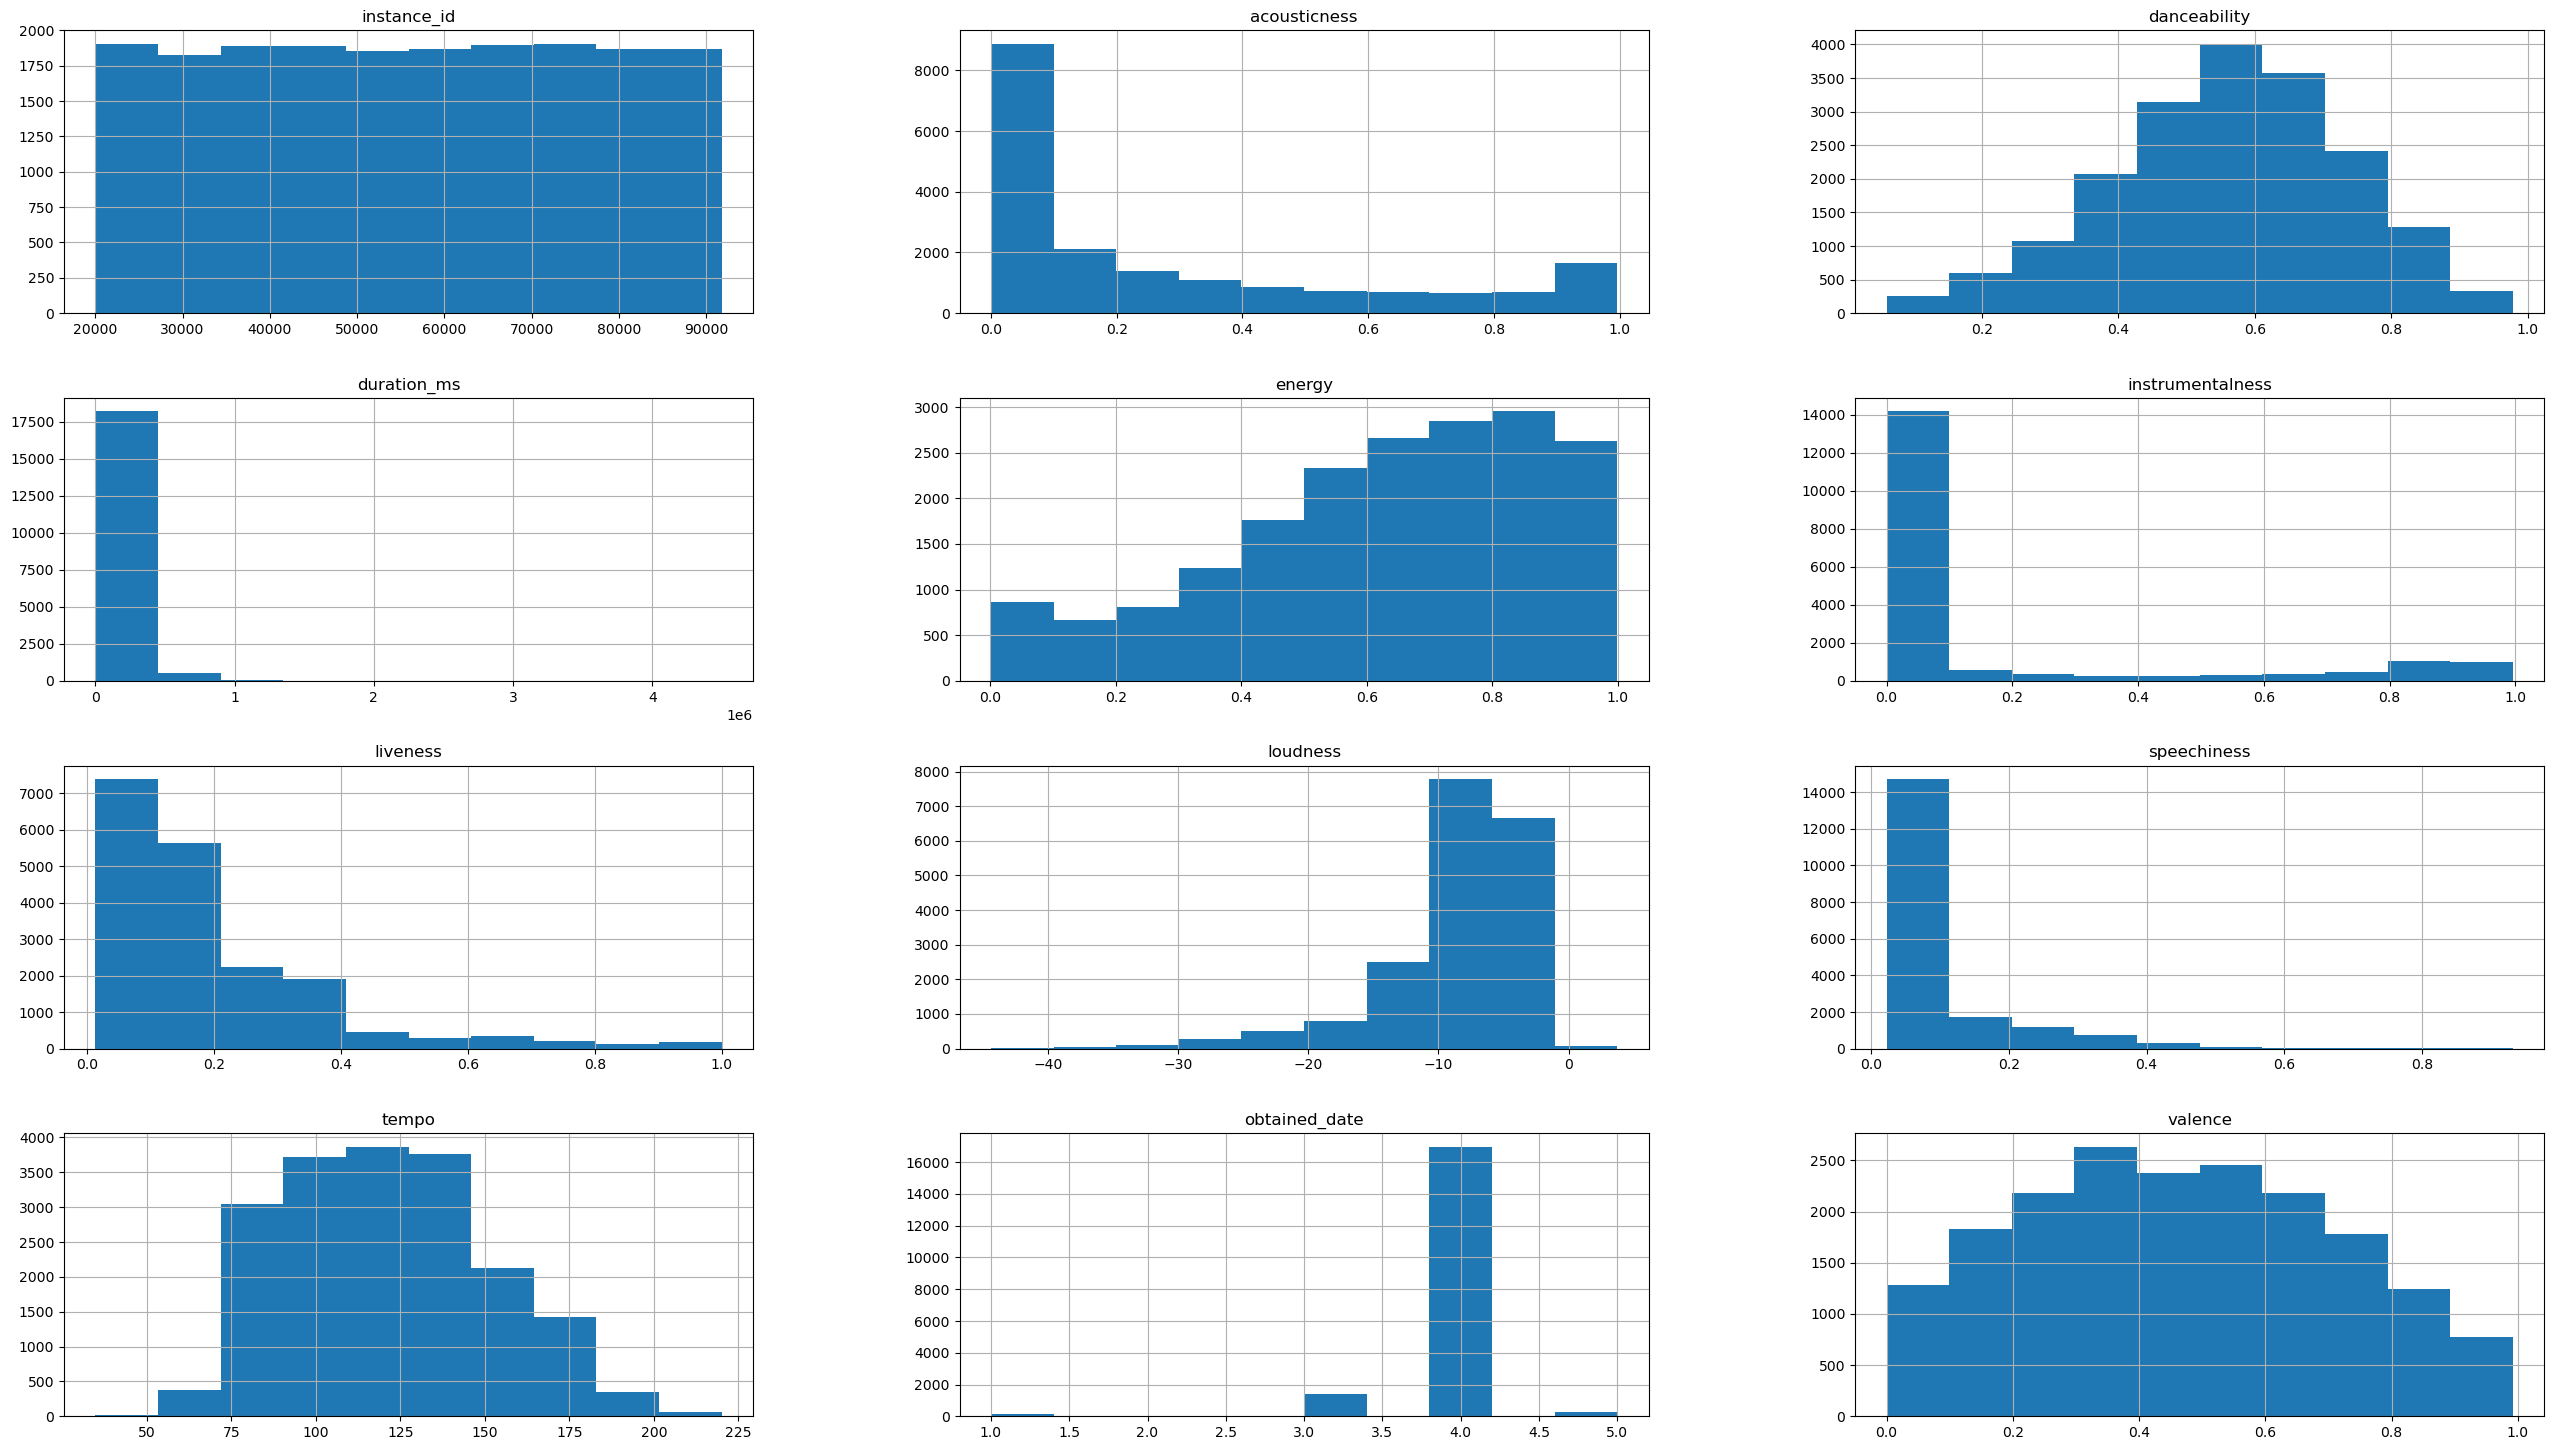

In [9]:
df_train.hist(figsize=(32, 18))

array([[<Axes: title={'center': 'instance_id'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'obtained_date'}>,
        <Axes: title={'center': 'valence'}>]], dtype=object)

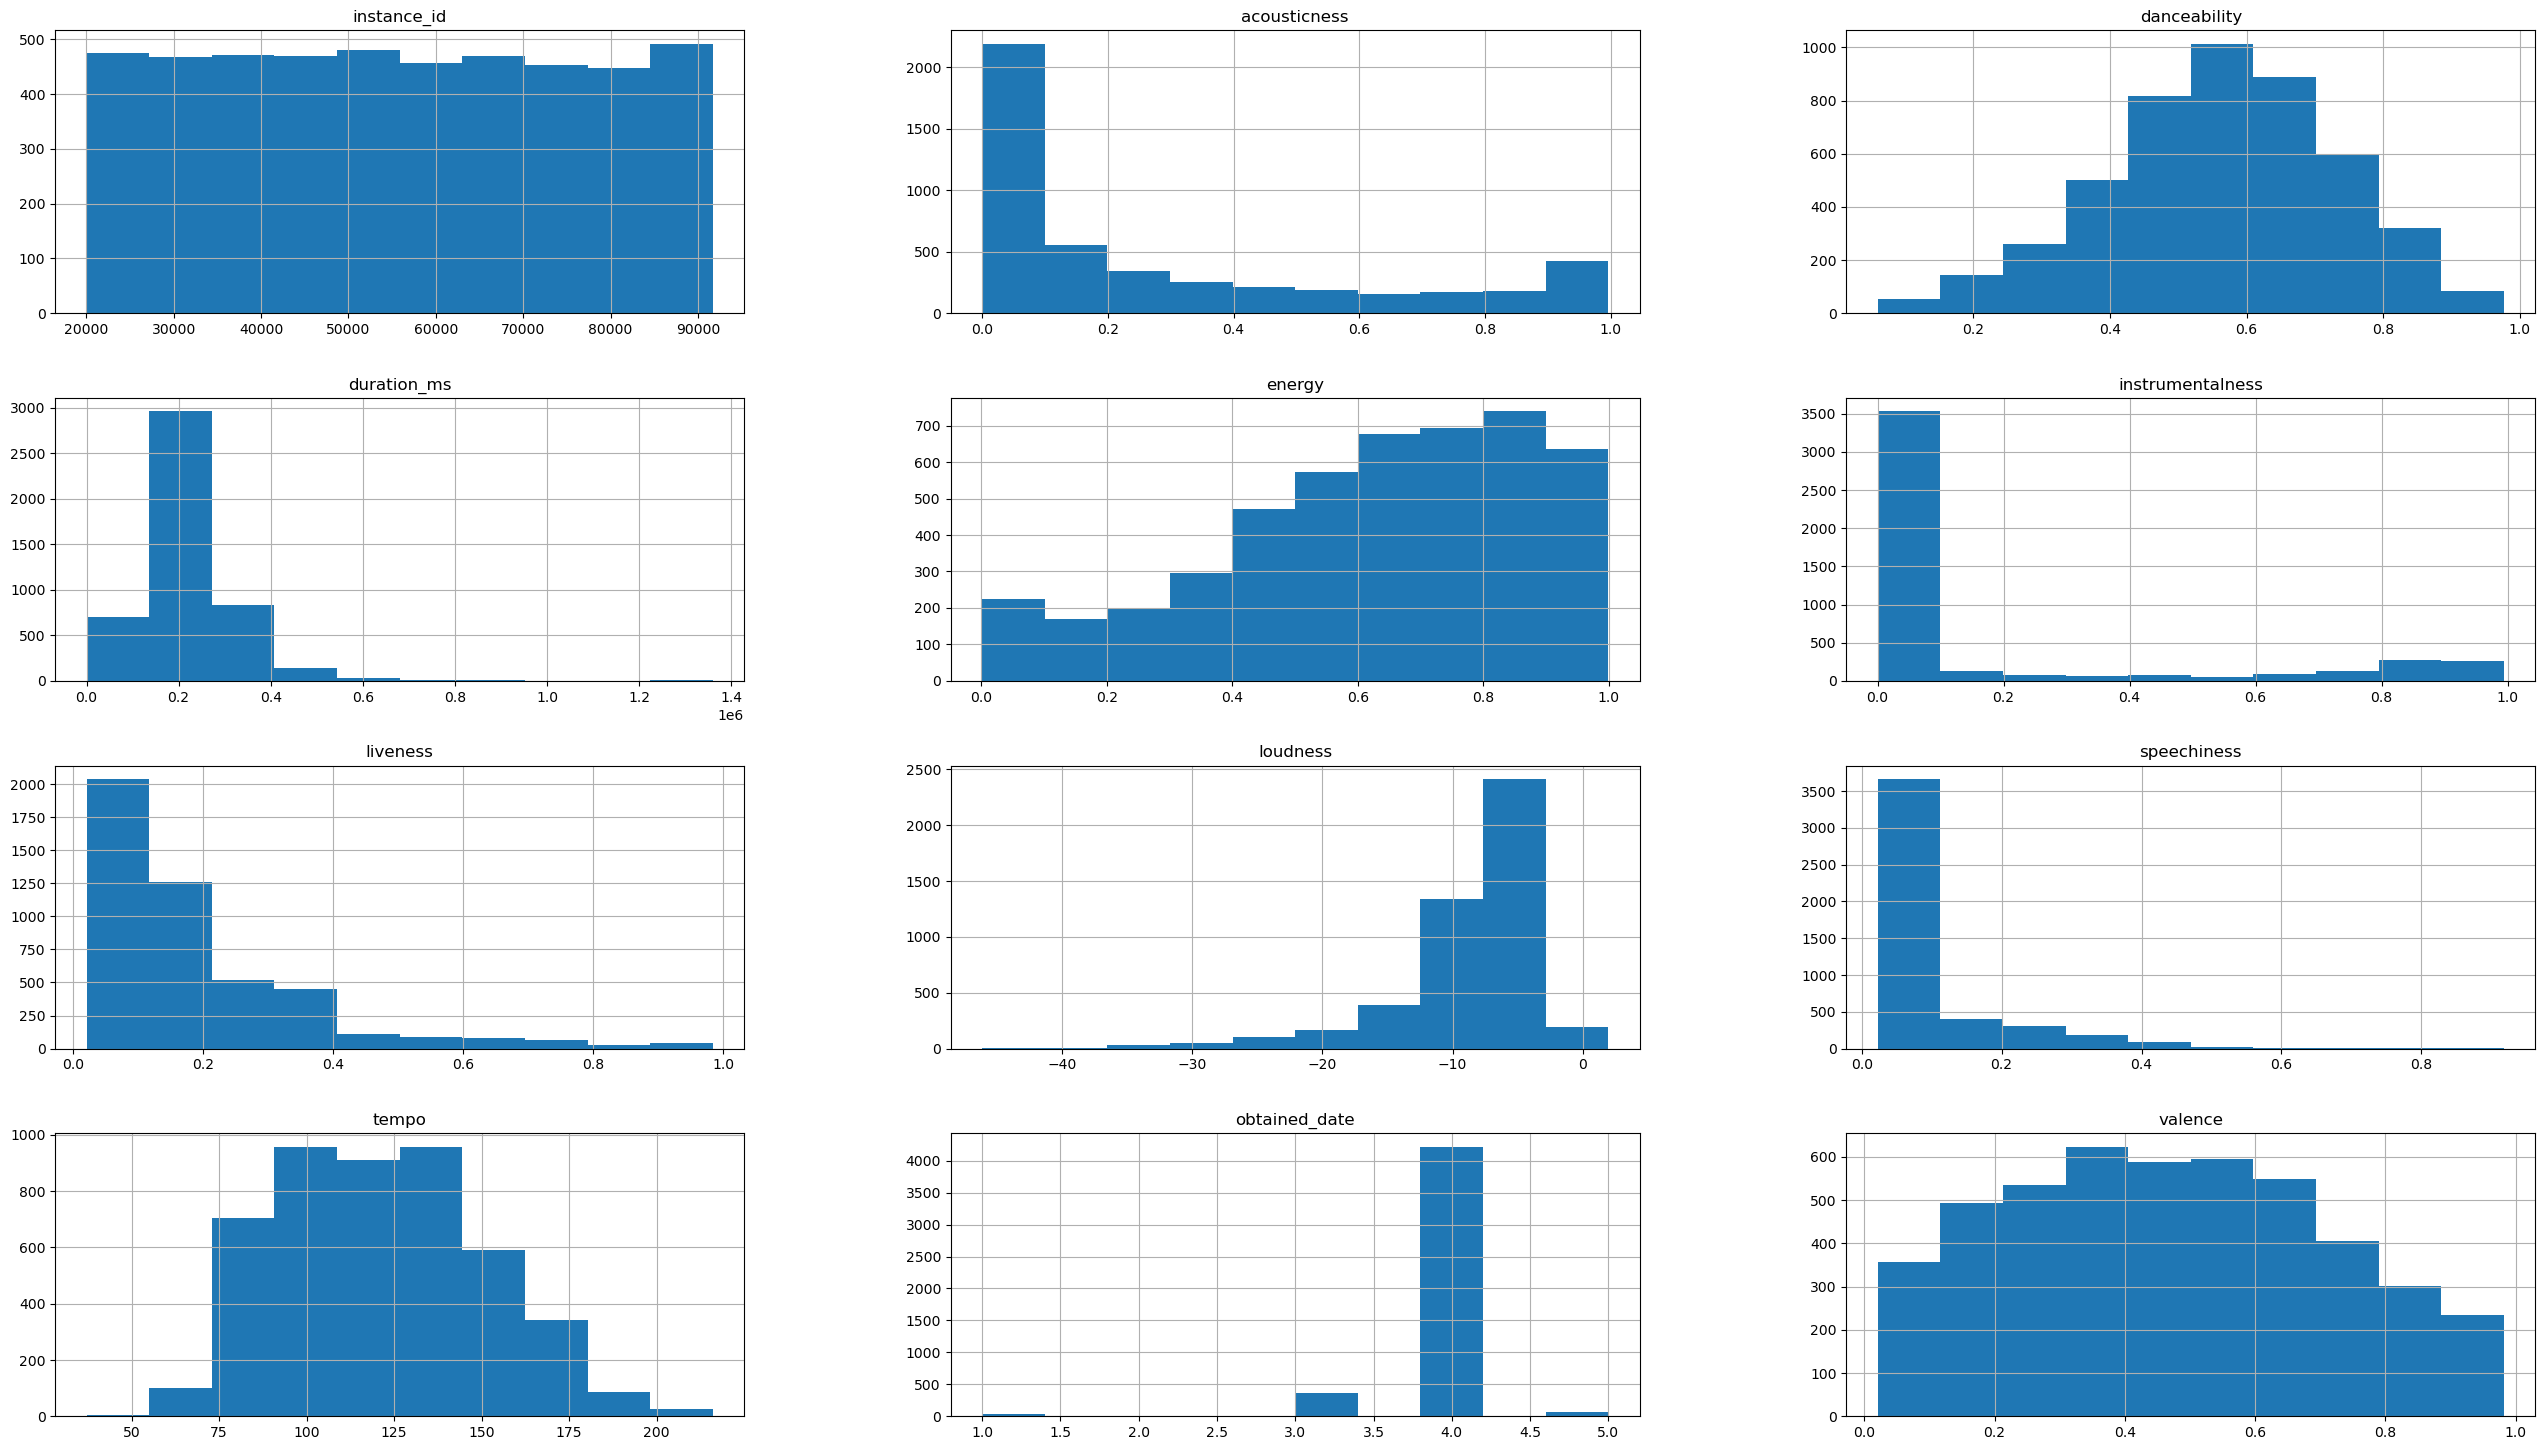

In [10]:
df_test.hist(figsize=(32, 18))

Всё выглядит логично.

Первичная обработка завершена. Пора переходить к обучению модели.

### Шаг 3. Обучение модели

Посмотрим на работу двух моделей - логистической регрессии и леса.

Определю признаки и разделю данные на выборки:

In [11]:
target = df_train['music_genre'] #Целевой признак
features = df_train.drop(['music_genre', 'track_name'], axis=1) #Остальные признаки

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.6, 
                                                  random_state=12345, stratify=target)

Воспользуюсь техникой OHE для кодирования признаков:

In [12]:
features_ohe_train = pd.get_dummies(features_train)
features_ohe_valid = pd.get_dummies(features_valid)

print(features_ohe_train.head())

       instance_id  acousticness  danceability  duration_ms  energy  \
9730       88732.0       0.14900         0.343     233613.0  0.4820   
8332       27101.0       0.01860         0.583     180000.0  0.8410   
18305      69377.0       0.91700         0.375     185880.0  0.2820   
4104       84923.0       0.99200         0.294     228840.0  0.0497   
12885      35108.0       0.00105         0.575     338280.0  0.7240   

       instrumentalness  liveness  loudness  speechiness    tempo  ...  \
9730           0.000005    0.8520    -7.864       0.0277   76.949  ...   
8332           0.000000    0.1050    -3.665       0.1900   90.646  ...   
18305          0.000192    0.1080   -10.902       0.0337   72.518  ...   
4104           0.926000    0.0868   -25.347       0.0424   72.128  ...   
12885          0.003540    0.0998    -6.505       0.0237  108.126  ...   

       key_C#  key_D  key_D#  key_E  key_F  key_F#  key_G  key_G#  mode_Major  \
9730    False  False   False  False  False   Fa

Сначала логистическая регрессия:

In [22]:
model = LogisticRegression(solver='newton-cholesky', random_state=12345, class_weight='balanced')
model.fit(features_ohe_train, target_train)

predicted_valid = model.predict(features_ohe_valid)
probabilities_valid = model.predict_proba(features_ohe_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("Значение F1:", f1_score(target_valid, predicted_valid, average='macro'))

Значение F1: 0.37206833008566814


Уже неплохо, двигаемся дальше.

Лес:

In [14]:
answer_depth = 0
f1 = 0
"""
for depth in range(1, 16):
    model = RandomForestClassifier(max_depth=depth, n_estimators=80, random_state=12345)
    model.fit(features_ohe_train, target_train)
    
    predicted_valid = model.predict(features_ohe_valid)
    probabilities_valid = model.predict_proba(features_ohe_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    if f1_score(target_valid, predicted_valid, average='macro') > f1:
        answer_depth = depth
        f1 = f1_score(target_valid, predicted_valid, average='macro')

print("Лучшая глубина поиска:", answer_depth)
print("Значение F1:", f1)
"""

'\nfor depth in range(1, 16):\n    model = RandomForestClassifier(max_depth=depth, n_estimators=80, random_state=12345)\n    model.fit(features_ohe_train, target_train)\n    \n    predicted_valid = model.predict(features_ohe_valid)\n    probabilities_valid = model.predict_proba(features_ohe_valid)\n    probabilities_one_valid = probabilities_valid[:, 1]\n    if f1_score(target_valid, predicted_valid, average=\'macro\') > f1:\n        answer_depth = depth\n        f1 = f1_score(target_valid, predicted_valid, average=\'macro\')\n\nprint("Лучшая глубина поиска:", answer_depth)\nprint("Значение F1:", f1)\n'

Лучшая глубина поиска 15. Попробуем посмотреть на n_estimators

In [15]:
answer_depth = 0
f1 = 0


model = RandomForestClassifier(max_depth=15, n_estimators=80, random_state=12345, class_weight='balanced')
model.fit(features_ohe_train, target_train)
    
predicted_valid = model.predict(features_ohe_valid)
probabilities_valid = model.predict_proba(features_ohe_valid)
probabilities_one_valid = probabilities_valid[:, 1]
f1 = f1_score(target_valid, predicted_valid, average='macro')


print("Значение F1:", f1)

Значение F1: 0.4178750035936319


Результат превзашёл логистическую регрессию. Предлагаю оставить лес.

Предлагаю посмотреть на взаимосвязи при помощи матрицы корреляции.

In [26]:
features_ohe_heatmap = pd.get_dummies(df_train.drop(['track_name'], axis=1))

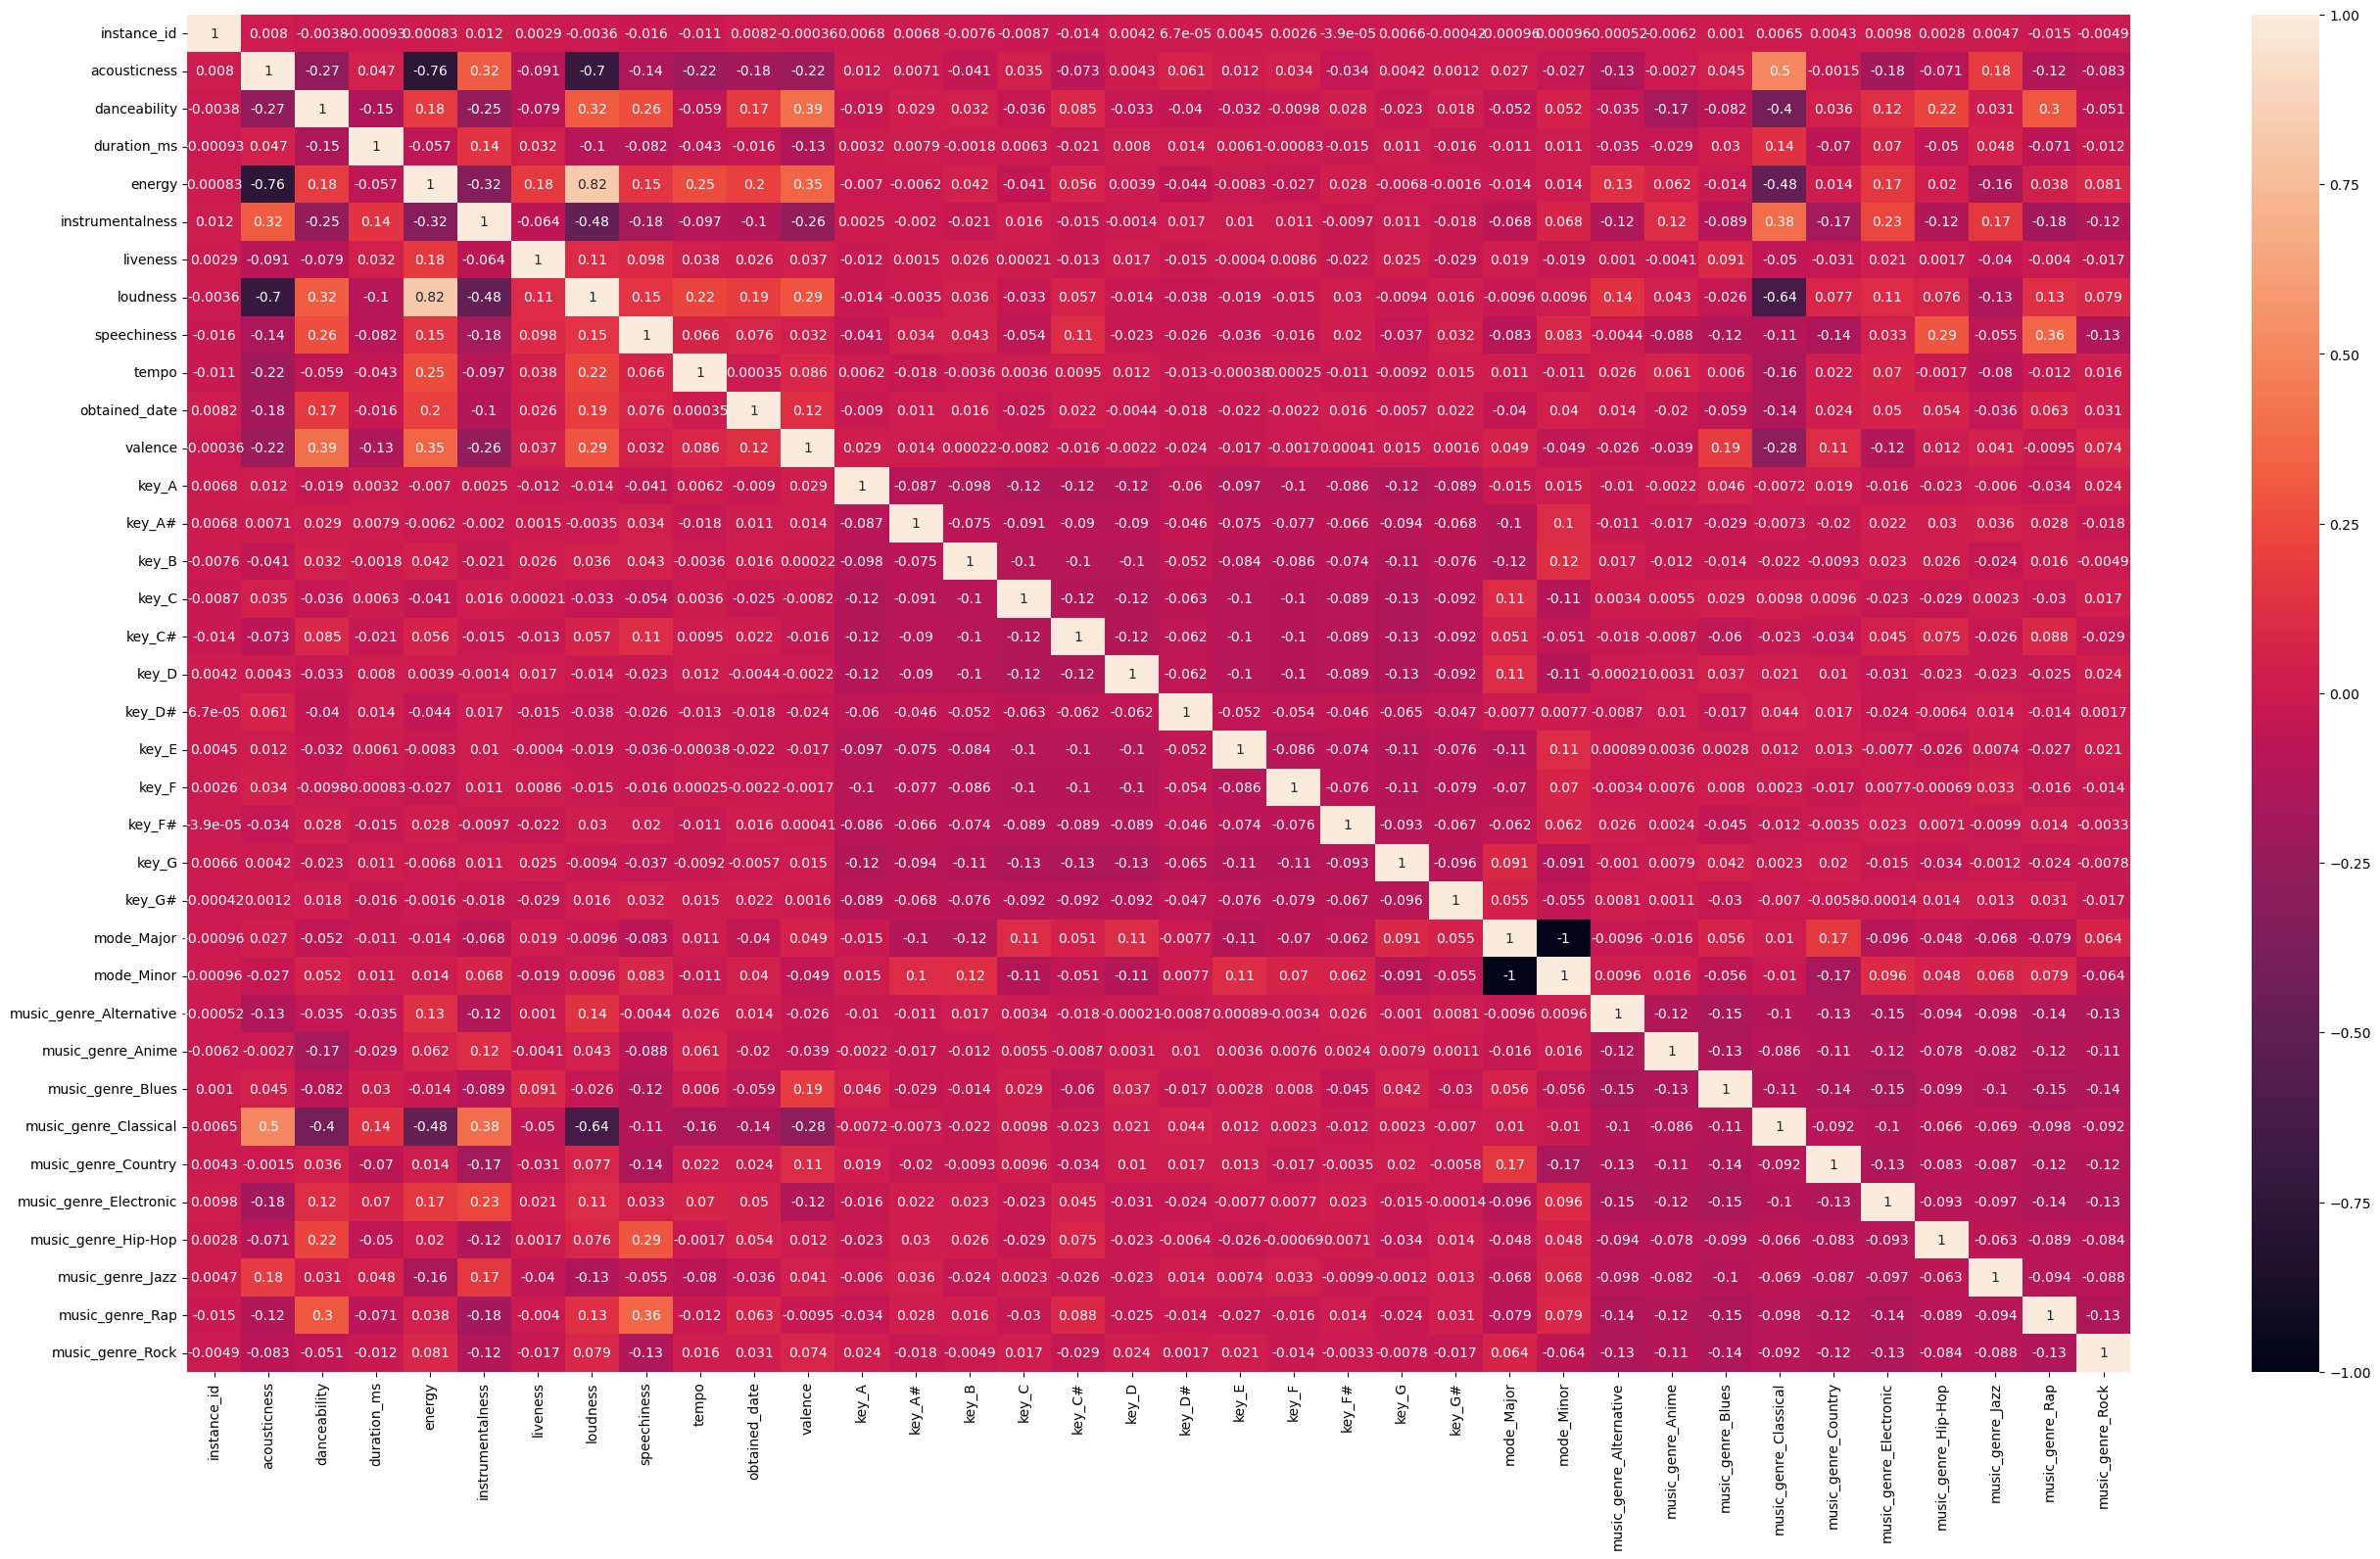

In [28]:
plt.figure(figsize=(32, 18))

sns.heatmap(features_ohe_heatmap.corr(), annot=True)

plt.show()

Самый показательный жанр - классическая музыка. Я считаю, что это неудивительно, ведь классика больше подвержена "правилам", соответственно выявить взаимосвязи в ней проще. Остальные жанры могут содержать в себе множество различных элементов, я и сам слышал произведения жанра хип-хоп, которые к примеру могут содержать в себе отрезки классической музыки. Поэтому отследить взяимосвязи в остальных жанрах становится гораздо сложнее. Но основные моменты: хип-хоп и рэп часто используют для танцев, это видно и в матрице, а также видно, что в них используют голос (очевидно). В жанрах джаз и электроника (как и в классике) отслеживается инструментальность, в джазе аккустика.

### Шаг 4. Вывод:

В ходе работы над проектом я выполнил следующие этапы:

* Посмотрел на данные, ознакомился с пропусками, дубликатами, артефактами. Ничего критического обнаружено не было, с данными было приятно работать. Числовые значения дополнительно проверил при помощи графиков. Даты перевёл в числа, ведь месяц был одинаковым, а год не указан вовсе.


* При помощи OHE я закодировал данные, перед этим разделив их на обучающую и валидационную выборки. Затем я обучил 2 модели и посмотрел на их показатель F1 меры, гиперпараметры я подбирал вручную, лучший результат показал "лес".


* Построил матрицу корреляции, посмотрел на взаимосвязи между признаками и жанрами музыки. Наиболее предсказуемый (зависимый) жанр это классика.